In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(7)

In [2]:
def rbf(x, v, s):
    eudistance = np.linalg.norm(x-v)
    return np.exp(-eudistance / (2*s**2))

In [3]:
def training(centers, xtrain, ytrain, s):
    size = xtrain.shape[0]
    #iterate through all neurons
    D = []
    for i in xtrain:
        for j in centers:
            R = rbf(i, j, s)
            D.append(R)
    DD=np.array(D)
    # reshape into matrix
    G = DD.reshape(size,size)
    #get weights
    w = np.linalg.pinv(G.T @ G) @ G.T @ ytrain
    return w

In [4]:
def testing(centers, w, s, xtest):
    yp = []
    for i in xtest:
        gt = []
        for j in centers:
            chec = rbf(i, j, s)
            gt.append(chec)
        gtest=np.array(gt)

        #get label from last neuron
        if gtest @ w < 0:
            yp.append(-1)
        else:
            yp.append(1)
    ypred = np.array(yp)
    return ypred

In [5]:
def accuracy(y_true, y_pred):
    if not (len(y_true) == len(y_pred)):
        print('Size of predicted and true labels not equal.')
        return 0.0

    corr = 0
    for i in range(0,len(y_true)):
        corr += 1 if (y_true[i] == y_pred[i]).all() else 0

    return corr/len(y_true)

In [6]:
def mse(ytest, ypred):
    return sum((ytest - ypred)**2)/(ytest.shape[0])

END OF SET UP

PART 1:


In [7]:
#generate centers
vgen = []
for i in range (0,21):
    for j in range (0,21):
        # label the centers
        if (-2. + (i*.2))**2 + (-2. + (j*.2))**2 > 1:
            y = -1
        else:
            y = 1
        p = (-2. + (i*.2), -2. + (j*.2), y)
        vgen.append(p)
vin = np.array(vgen)
#shuffle the points
np.random.shuffle(vin)

In [8]:
#separate training from testing
xtrain = vin[:350,0:2]
ytrain = vin[:350,2]
centers = xtrain
xtest = vin[350:,0:2]
ytest = vin[350:,2]

In [9]:
# TRAIN AND TEST ON DIFFERENT SPREADS FROM 1 TO 1000
err = []
acc = []
ss = []
for s in range(1, 1000, 10):
    w = training(centers, xtrain, ytrain, s)
    ypred = testing(centers, w, s, xtest)
    er = mse(ytest, ypred)
    ac = accuracy(ytest, ypred)
    err.append(er)
    acc.append(ac)
    ss.append(s)

Text(0.5, 1.0, 'Mean Squared Error')

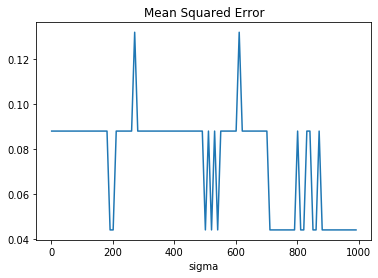

In [10]:
plt.plot(ss, err)
plt.xlabel('sigma')
plt.title('Mean Squared Error')

Text(0.5, 1.0, 'Accuracy')

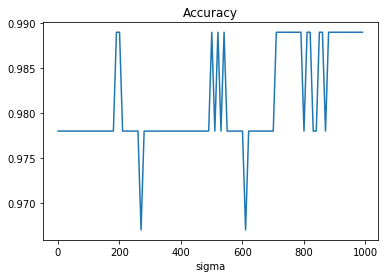

In [11]:
plt.plot(ss, acc)
plt.xlabel('sigma')
plt.title('Accuracy')

The error seems to stabilize on a low point on the higher sigma values so i will keep my sigma on 1000 for the next parts.

PART 2

A:

Using 150 random centers

In [12]:
#using 150 centers (my centers were already randomized)
xtrain = vin[:150,0:2]
ytrain = vin[:150,2]
centers = xtrain
xtest = vin[150:,0:2]
ytest = vin[150:,2]

In [13]:
s = 1000
w = training(centers, xtrain, ytrain, s)
ypred = testing(centers, w, s, xtest)
error2 = mse(ytest, ypred)
accuracy2 = accuracy(ytest, ypred)

In [14]:
error2

0.09621993127147767

In [15]:
accuracy2

0.9759450171821306

PART 2

B:

Getting centres from Kmeans

In [16]:
from sklearn.cluster import KMeans
#remove labels
vk = vin[:,0:2]
kmeans = KMeans(n_clusters=150, random_state=0).fit(vk)

In [17]:
kcenters = kmeans.cluster_centers_

In [18]:
# label the kmeans centers
yk = []
for row in kcenters:
    if (row[0]**2 + row[1]**2) > 1:
        y = -1
    else:
        y = 1
    yk.append(y)
ykm=np.array(yk)

In [19]:
s = 1000
w3 = training(kcenters, kcenters, ykm, s)
ypred3 = testing(kcenters, w3, s, xtest)
error3 = mse(ytest, ypred3)
accuracy3 = accuracy(ytest, ypred3)

In [20]:
error3

0.08247422680412371

In [21]:
accuracy3

0.979381443298969

It improved a bit from 0.9759 when using 150 random points.